In [26]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import optimize

raw_dfp = pd.read_csv('Doppler_Free_Peak_T1.CSV',header=None)
raw_dfp

,0,1,2,3,4,5
0,Record Length,2.500000e+03,NaN,0.04150,-0.038,NaN
1,Sample Interval,1.000000e-05,NaN,0.04151,-0.038,NaN
2,Trigger Point,-4.150000000000e+03,NaN,0.04152,-0.038,NaN
3,NaN,NaN,NaN,0.04153,-0.038,NaN
4,NaN,NaN,NaN,0.04154,-0.038,NaN
...,...,...,...,...,...,...
2495,NaN,NaN,NaN,0.06645,0.022,NaN
2496,NaN,NaN,NaN,0.06646,0.024,NaN
2497,NaN,NaN,NaN,0.06647,0.024,NaN
2498,NaN,NaN,NaN,0.06648,0.024,NaN


In [36]:
t_dfp = raw_dfp[3]
V_dfp = raw_dfp[4]

In [35]:
t_data = np.array(t_dfp)
V_data = np.array(V_dfp)

Text(0, 0.5, 'Voltage (V)')

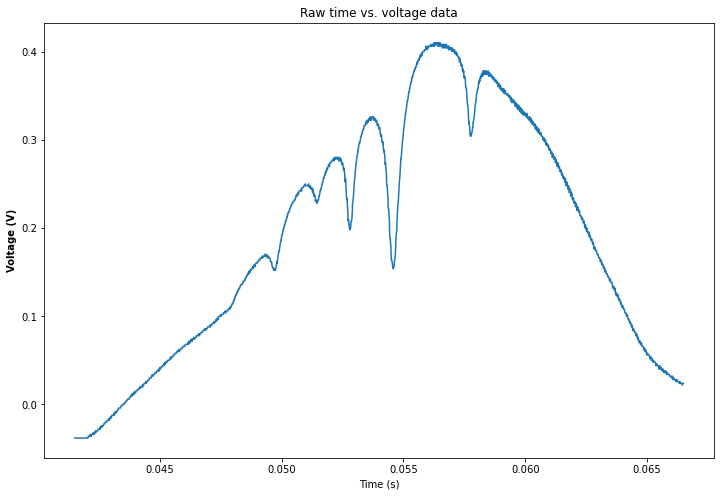

In [49]:
fig,ax = plt.subplots(figsize = (12,8))
ax.plot(t_data, V_data)

ax.set_title('Raw time vs. voltage data')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Voltage (V)', fontsize=10, fontweight='bold')

In [41]:
cal_dfp = pd.read_csv('Michelson_Interferometer_data_on_Peak.CSV',header=None)
cal_dfp

,0,1,2,3,4,5
0,Record Length,2.500000e+03,NaN,0.00800,-0.20,NaN
1,Sample Interval,4.000000e-05,NaN,0.00804,-0.20,NaN
2,Trigger Point,-2.000000000000e+02,NaN,0.00808,-0.20,NaN
3,NaN,NaN,NaN,0.00812,-0.20,NaN
4,NaN,NaN,NaN,0.00816,-0.20,NaN
...,...,...,...,...,...,...
2495,NaN,NaN,NaN,0.10780,0.84,NaN
2496,NaN,NaN,NaN,0.10784,0.84,NaN
2497,NaN,NaN,NaN,0.10788,0.84,NaN
2498,NaN,NaN,NaN,0.10792,0.84,NaN


In [53]:
t_dfp_cal = cal_dfp[3]
V_dfp_cal = cal_dfp[4]

In [54]:
t_cal_data = np.array(t_dfp_cal)
V_cal_data = np.array(V_dfp_cal)
print(t_cal_data)
print(V_cal_data)

[0.008   0.00804 0.00808 ... 0.10788 0.10792 0.10796]
[-0.2  -0.2  -0.2  ...  0.84  0.84  0.84]


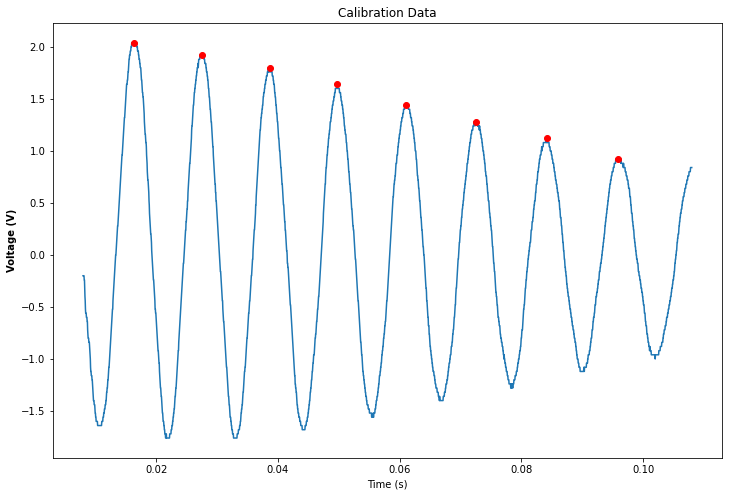

In [60]:
fig,ax = plt.subplots(figsize = (12,8))
ax.plot(t_cal_data, V_cal_data)

ax.set_title('Calibration Data')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Voltage (V)', fontsize=10, fontweight='bold')

cal_p1 = [0.016380000000, 2.04000]
cal_p2 = [0.027520000000, 1.92000]
cal_p3 = [0.038640000000, 1.80000]
cal_p4 = [0.049720000000, 1.64000]
cal_p5 = [0.061120000000, 1.44000]
cal_p6 = [0.072480000000, 1.28000]
cal_p7 = [0.084160000000, 1.12000]
cal_p8 = [0.095880000000, 0.92000]

ax.plot(cal_p1[0], cal_p1[1], marker='o', color='red')
ax.plot(cal_p2[0], cal_p2[1], marker='o', color='red')
ax.plot(cal_p3[0], cal_p3[1], marker='o', color='red')
ax.plot(cal_p4[0], cal_p4[1], marker='o', color='red')
ax.plot(cal_p5[0], cal_p5[1], marker='o', color='red')
ax.plot(cal_p6[0], cal_p6[1], marker='o', color='red')
ax.plot(cal_p7[0], cal_p7[1], marker='o', color='red')
ax.plot(cal_p8[0], cal_p8[1], marker='o', color='red')

In [67]:
# now, using the cal values, we can calibrate the spectra because each peak corresponds to a moment of absolute constructive
# interference.  At these points, L=n\lambda = d1 - d2.  So, we can find the rate of change in frequency

# set up the vector:

cal_array_time = [cal_p1[0], cal_p2[0], cal_p3[0], cal_p4[0], cal_p5[0], cal_p6[0], cal_p7[0], cal_p8[0]]
cal_array_v = [cal_p1[1], cal_p2[1], cal_p3[1], cal_p4[1], cal_p5[1], cal_p6[1], cal_p7[1], cal_p8[1]]

c = 2.998*10**8 # m/s

# so, time stays the same, and we just need the differences in the michelson interferometer to get what we need
# 
d1 = 0.444 # m 
d_d1 = 0.002 # m

d2 = 0.0127
d_d2 = 0.002 #m

L = d1 - d2
dL = d_d1 + d_d2

# in the future, we can calculate the uncertainty by using the total uncertainty from the subtraction and then doing the division

freq_vector = [0]*8

for i in range(0,8):
    freq_vector[i] = (i)*c/L
    
print(freq_vector)

[0.0, 695107813.5868305, 1390215627.173661, 2085323440.7604914, 2780431254.347322, 3475539067.9341526, 4170646881.5209827, 4865754695.107814]


<ErrorbarContainer object of 3 artists>

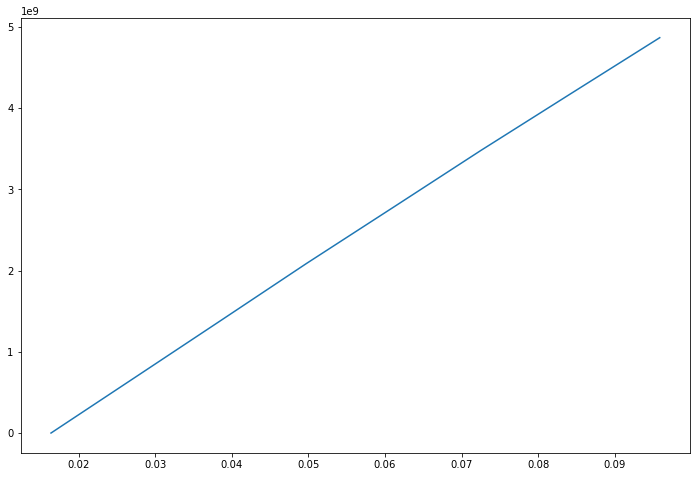

In [70]:
fig,ax = plt.subplots(figsize = (12,8))
ax.errorbar(cal_array_time, freq_vector)